##**Mask Detector**##

In [1]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-06-06 13:56:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.005s  

2022-06-06 13:56:42 (188 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



**Uploading Image**

In [2]:
from google.colab import files
file=files.upload()

Saving Example 1.jpg to Example 1.jpg


In [3]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:

np.set_printoptions(suppress=True)

model = tensorflow.keras.models.load_model('keras_model.h5', compile=False)

**Predicting one by clicking it live**

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


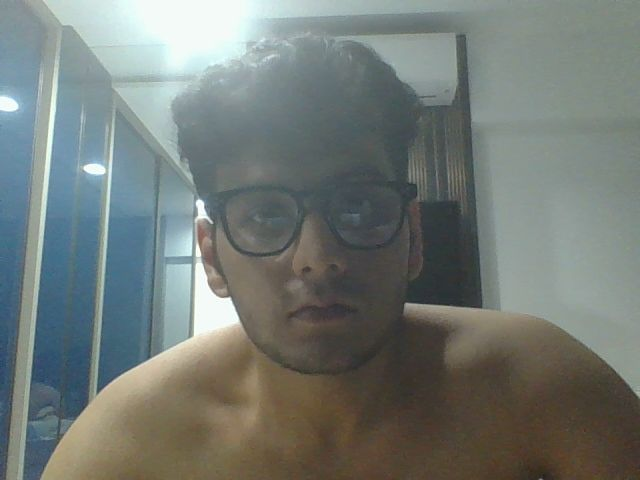

In [7]:
from IPython.display import Image as Image1
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image1(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Prediction 1**

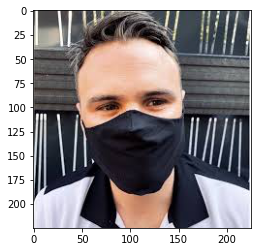

In [9]:
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open('Example 1.jpg')
normal = plt.imshow(image)
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [10]:
# run the inference
pred = model.predict(data)

prediction = pred.argmax(axis=-1)
#print(pred)

label = "Mask On" if prediction == 0 else "No Mask"
label = "{}: {:.2f}%".format(label, max(pred[0]) * 100)
color = (0, 255, 0) if prediction == 0 else (255, 0, 0)

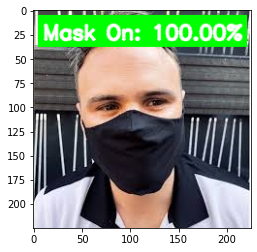

In [12]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('/content/Example 1.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#print(faces)

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Creating Box for face
if(len(faces)!=0):
  for (x,y,w,h) in faces:
      cv2.rectangle(im_rgb,(x,y),(x+w,y+h),color, 4)
      #cv2.rectangle(im_rgb, (x,y), (x+w,y-35), color, cv2.FILLED)
      cv2.putText(im_rgb, label, (x+5, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA)
   
else:
  cv2.rectangle(im_rgb, (5, 37), (220, 5), color, cv2.FILLED)
  cv2.putText(im_rgb, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA)

#detected Image
detect = plt.imshow(im_rgb)

**Prediction 2**

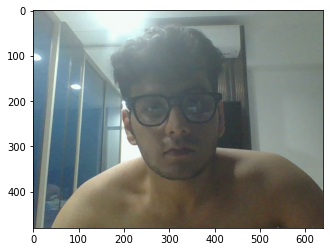

In [13]:
data2 = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image2 = Image.open('/content/photo.jpg')
normal = plt.imshow(image2)
size = (224, 224)
image2 = ImageOps.fit(image2, size, Image.ANTIALIAS)
image_array2 = np.asarray(image2)
normalized_image_array2 = (image_array2.astype(np.float32) / 127.0) - 1
data2[0] = normalized_image_array2

In [15]:

pred2 = model.predict(data2)
prediction2 = pred2.argmax(axis=-1)

label = "Mask On" if prediction2 == 0 else "No Mask"
label = "{}: {:.2f}%".format(label, max(pred2[0]) * 100)
color = (0, 255, 0) if prediction2 == 0 else (255, 0, 0)

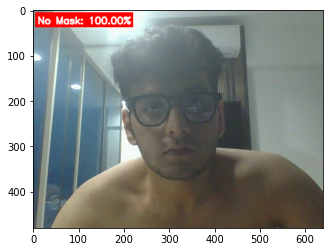

In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img2 = cv2.imread('/content/photo.jpg')

gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
faces2 = face_cascade.detectMultiScale(gray, 1.3, 5)


im_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


if(len(faces2)!=0):
  for (x,y,w,h) in faces2:
      cv2.rectangle(im_rgb2,(x,y),(x+w,y+h),color, 4)
     
      cv2.putText(im_rgb2, label, (x+5, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA)
   
else:
  cv2.rectangle(im_rgb2, (5, 37), (220, 5), color, cv2.FILLED)
  cv2.putText(im_rgb2, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA)

detect = plt.imshow(im_rgb2)